In [19]:
import pandas as pd
import os
import urllib.request
import numpy as np
import xgboost
import matplotlib.pyplot as plt
from xgboost import XGBClassifier

In [13]:
if 'df_realestate.csv' not in os.listdir('data'):
    url = 'https://s3.amazonaws.com/datasets-jeremy/df_realestate.csv'  
    urllib.request.urlretrieve(url, os.path.join('data', 'df_realestate.csv')) 
    
if 'df_realestate_processed.csv' not in os.listdir('data'):
    url = 'https://s3.amazonaws.com/datasets-jeremy/df_realestate_processed.csv'  
    urllib.request.urlretrieve(url, os.path.join('data', 'df_realestate_processed.csv'))  

In [14]:
# before preprocessing
file = os.path.join('data', 'df_realestate.csv')
df_realestate = pd.read_csv(file, encoding='big5')
df_realestate

# processed
path = "data//df_realestate_processed.csv"
df_realestate_processed = pd.read_csv(path)
X = df_realestate_processed.drop(["price_per_meter", "total_price"], axis=1)
Y = df_realestate_processed['total_price']


c:\program files (x86)\microsoft visual studio\installer\shared\python36_64\lib\site-packages\IPython\core\interactiveshell.py:3018: DtypeWarning: Columns (5,6,8,11,13,21,29,32,60) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [15]:
# Start Your Code Here

X_train = X.iloc[:-1000]
Y_train = Y.iloc[:-1000]
Y_train = np.log(Y_train) 

X_valid = X.iloc[-1000:]
Y_valid = Y.iloc[-1000:]
Y_valid = np.log(Y_valid) 

In [21]:
params = {}
params['objective'] = 'reg:linear'
params['eval_metric'] = 'rmse'
params['eta'] = 0.05
params['max_depth'] = 5
d_train = xgboost.DMatrix(X_train, label=Y_train)
d_valid = xgboost.DMatrix(X_valid, label=Y_valid)
watchlist = [(d_train, 'train'), (d_valid, 'valid')]
bst = xgboost.train(params, d_train, 3000, watchlist, early_stopping_rounds=10, verbose_eval=10)
Y_pred = bst.predict(xgboost.DMatrix(X_valid))

[20:08:59] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[0]	train-rmse:15.4854	valid-rmse:15.3016
Multiple eval metrics have been passed: 'valid-rmse' will be used for early stopping.

Will train until valid-rmse hasn't improved in 10 rounds.
[20:08:59] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=5
[20:08:59] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[20:08:59] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[20:08:59] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[20:08:59] C:\Users\Administrator\Desktop\xgboost\src\tree

[20:09:05] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 0 pruned nodes, max_depth=5
[20:09:05] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[20:09:05] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 0 pruned nodes, max_depth=5
[20:09:05] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=5
[20:09:06] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[20:09:06] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[20:09:06] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

[20:09:12] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 50 extra nodes, 0 pruned nodes, max_depth=5
[20:09:12] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[20:09:12] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=5
[20:09:12] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=5
[20:09:12] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=5
[20:09:12] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 0 pruned nodes, max_depth=5
[110]	train-rmse:0.241504	valid-rmse:0.338156
[20:09:12] C:\Users\Administrator\Desktop\xgboos

[20:09:18] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 0 pruned nodes, max_depth=5
[20:09:18] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[20:09:19] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[160]	train-rmse:0.226371	valid-rmse:0.326378
[20:09:19] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 0 pruned nodes, max_depth=5
[20:09:19] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 0 pruned nodes, max_depth=5
[20:09:19] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 58 extra nodes, 0 pruned nodes, max_depth=5
[20:09:19] C:\Users\Administrator\Desktop\xgboos

[20:09:25] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 42 extra nodes, 0 pruned nodes, max_depth=5
[20:09:25] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 56 extra nodes, 0 pruned nodes, max_depth=5
[20:09:25] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 0 pruned nodes, max_depth=5
[20:09:25] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 52 extra nodes, 0 pruned nodes, max_depth=5
[20:09:25] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 60 extra nodes, 0 pruned nodes, max_depth=5
[20:09:25] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 54 extra nodes, 0 pruned nodes, max_depth=5
[20:09:26] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

[20:09:31] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 0 pruned nodes, max_depth=5
[20:09:31] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 42 extra nodes, 0 pruned nodes, max_depth=5
[20:09:32] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 44 extra nodes, 0 pruned nodes, max_depth=5
[20:09:32] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 48 extra nodes, 0 pruned nodes, max_depth=5
[20:09:32] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=5
[20:09:32] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 32 extra nodes, 0 pruned nodes, max_depth=5
[20:09:32] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

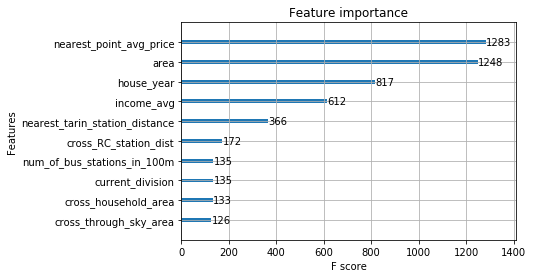

In [24]:
xgboost.plot_importance(bst, max_num_features=10)

plt.show()

In [25]:
df_result = pd.DataFrame()

# 1. 使用X_valid去評價此模型
# 2. 使用 ['predict', 'truth', 'error'] 三個欄位的DataFrame去使決畫呈現預測結果
#    (1). 請注意與測結果(Y_pred)與真實值(Y_valid)都必須取exp方能反映實際情況
#    (2). error 請使用計算(predict-truth)/truth計算誤差百分比
#=============your works starts===============#
Y_pred = bst.predict(xgboost.DMatrix(X_valid))
df_result['predict'] = np.exp(Y_pred)
df_result['truth'] = np.exp((list(Y_valid)))
df_result['error'] = df_result.apply(lambda x:np.abs(x['predict'] - x['truth']) / x['truth'], axis=1)
df_result_sort = df_result.sort_values('truth')
#==============your works ends================#

df_result.head()

,predict,truth,error
0,15506774.0,15880006.78,0.023503
1,11470653.0,10999982.00,0.042788
2,31048778.0,28199982.04,0.101021
3,25428912.0,21920043.69,0.160076
4,3383902.5,3220663.36,0.050685


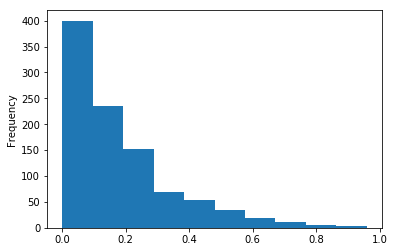

In [26]:
# 請使用df_result_sort濾掉error大於1的部分畫出error的分布圖
#!=============your works starts===============!#
df_result_sort.loc[df_result_sort['error'] < 1, 'error'].plot('hist')
#!==============your works ends================!#

plt.show()

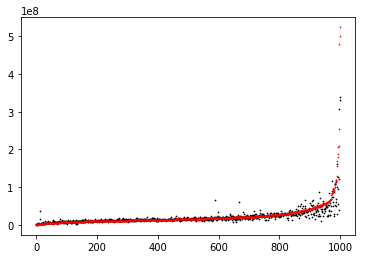

In [27]:
# 請使用plt.scatter，以0~len(df_result)作為x，預測值(黑色)與實際值(紅色)作為y。
#!=============your works starts===============!#
plt.scatter(range(len(df_result)), df_result_sort['predict'].values, color='black', s=0.5)
plt.scatter(range(len(df_result)), df_result_sort['truth'].values, color='red', s=0.5)
#!==============your works ends================!#

plt.show()

In [29]:
# 課程上或課程外學到的哪一些「前處理」、「分群」、「分類」技術(60%)
1.前處理 
遺失資料(missing data)的處理
a.將遺失值做標記處理(NA/NAN)
如:空值處填上:平均值、0等
b.過濾遺失值(dropna)
c.為遺失值填值
填常數:找出數據的平均值、標準差、屆在平均值與標準差之間的亂數
資料轉換:將重複值移除、通過函式或對應關係轉換值、用fillna取代遺失值
偵測和濾除離群值:若數值過大不好處理:用偵測(identity): PCA再用取對數的、正規化等方式做處理減少誤差。
「分群」、「分類」技術


In [ ]:
「分群」技術
定義:所有數據進行分組，相似數據歸類於同一組，一筆數據只屬於某一組，每一組稱作一個「群集 Cluster 」。
所學方法:
    KMeans:
        一、群集數量推定為 K ，隨機散佈 K 個點作為群集中心（常用既有的點）。
        二、每一點分類到距離最近的群集中心（常用直線距離）。
        三、重新計算每一個群集中心（常用平均值）。
        
        重複二與三，直到群集不變、群集中心不動為止。最後形成群集中心的 Voronoi Diagram 。
        時間複雜度為 O(NKT) ， N 是數據數量， K 是群集數量， T 是重複次數。我們無法預先得知群集數量、重複次數。數據分布情況、群集中心的初始位置，都會影響重複次數，運氣成份很大。
        缺點是群集不能重疊、群集分界不能是曲線和折線、極端數據容易使群集中心偏移、一開始難以決定群集數量與群集中心、數據分布呈甜甜圈時群集中心可能永不停住。
    
    K-Means++ Clustering:
        逐一設定 K 個群集中心。計算每一個點到已設定的群集中心的最短距離，以最短距離的 n 次方做為機率大小，決定下一個群集中心。距離越遠，機率越大。
        0 次方等同隨機散佈，K-Means。2次方是K-Means++ ,∞ 次方等同找最遠點，Farthest-point Traversal，效果最好。
        優點是群集中心比較分散，不容易擠在一起。
        
    EM Clustering/Gauss Mixture Model:
        假設每個群集各是一個常態分布，平均數、變異數可以相異。
        首先設定群集數量（常態分布數量）。然後將所有常態分布融合成一個分布，實施估計，估計方式採用 Maximum Likelihood ，演算法採用 EM Algorithm 。名稱是這樣來的。
        融合數個常態分布成為一個分布，即 Gauss Mixture Model ，替每個常態分布設定不同比重。
        優點是考慮了群集尺寸與疏密。
    
     K-Nearest Neighbor Clustering
        每一點各自找到距離最近的 K 個點作為鄰居，採多數決歸類到群集。如果距離超過了自訂臨界值，找不足 K 個鄰居，就替該點創造一個新的群集。
        優點是不用煩惱群集數量，缺點是群集鬆散。
        
    Jarvis-Patrick Clustering   
    每一點各自找到距離最近的 K 個點做為鄰居。當 a 和 b 彼此都是鄰居，或者 a 和 b 至少有 K' 個相同鄰居（ K' 是自訂臨界值， K' ≤ K ），則 a 和 b 歸類到同一個群集。
    優點是不用煩惱群集數量、群集形狀。

In [ ]:
「分類」技術
定義:分類：已知群集（類別），找到分界線。
    Support Vector Machine(SVM)
        考慮分界線到數據的距離。分界線位於正中央，兩類數據相隔越遠越好。準確來說，分界線到兩類數據的最短距離均等、最短距離越大越好。
        分界線是一條直線 ax+by+c=0 。一筆數據 (x₁,y₁) 到分界線的距離，就是將 (x₁,y₁) 代入點與直線距離公式，計算 (ax₁+by₁+c) / sqrt(a²+b²) 。距離有正負號，大於零就是在正側，小於零就是在反側，等於零就是在分界線上。
        間距線是兩條直線 ax+by+c=1 和 ax+by+c=-1 （截距縮放為 1 ）。間距線到分界線的距離，就是將間距線上任意一點代入點與直線距離公式。如此便得到半個間距。
    Gradient Boosting 
        實施分類演算法，得到分界線。然後不斷微調分界線。
        挑出分錯的數據，另外實施分類演算法，得到微調用的分界線。當前分界線，加上微調用的分界線，完成一次微調。重複這些步驟，直到分錯的數據足夠少，或者是誤差總和足夠小。
        微調用的分界線，可以乘上倍率。注意到倍率太大就不是微調了，倍率太小就失去調整效果了。
        
    